In [ ]:
import pandas as pd

In [ ]:
# import the data
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
speed = pd.read_csv("speed_summon_NYPD.csv")

In [ ]:
speed['VIOLATION_DATE'] = pd.to_datetime(speed['VIOLATION_DATE'])
speed['Date'] = speed['VIOLATION_DATE'].apply(lambda x: x.strftime('%Y-%m-%d'))
speed['Year'] = speed['VIOLATION_DATE'].apply(lambda x: x.strftime('%Y'))

speed = speed.sort_values(by=['VIOLATION_DATE'])

In [ ]:
speed_yr_date = pd.read_csv("speed__Year_to_Date_.csv")

In [ ]:
speed_yr_date['VIOLATION_DATE'] = pd.to_datetime(speed_yr_date['VIOLATION_DATE'])
speed_yr_date['Date'] = speed_yr_date['VIOLATION_DATE'].apply(lambda x: x.strftime('%Y-%m-%d'))
speed_yr_date['Year'] = speed_yr_date['VIOLATION_DATE'].apply(lambda x: x.strftime('%Y'))

In [ ]:
result = pd.concat([speed, speed_yr_date])
result['CITY_NM'] = result['CITY_NM'].replace({'NEW YORK': 'MANHATTAN'})

In [ ]:
result.CITY_NM.unique()

array(['QUEENS', 'BROOKLYN', 'STATEN ISLAND', 'BRONX', 'MANHATTAN', nan],
      dtype=object)

In [ ]:
from google.colab import files
result.to_csv('Human_caught_speeding.csv')
files.download('Human_caught_speeding.csv')

In [ ]:
result['VIOLATION_CODE'] = result['VIOLATION_CODE'].astype(str)

In [ ]:
sp= ['1180C']
schoolzone_list = result['VIOLATION_CODE'].isin(sp)
schoolzone = result.loc[schoolzone_list]

In [ ]:
schoolzone_by_date=schoolzone.groupby(['VIOLATION_DATE']).count()[['CHG_LAW_CD']]
schoolzone_by_date.rename(columns = {'CHG_LAW_CD' : 'Num_of_Violation'}, inplace = True)

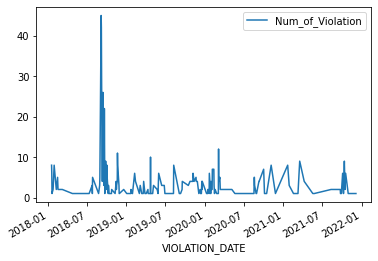

In [ ]:
schoolzone_by_date.plot()

In [ ]:
boro_drivers= pd.read_csv("boro_drivers.csv")
boro_drivers.rename(columns={'boro':'CITY_NM'}, inplace=True)
boro_drivers=boro_drivers.set_index('CITY_NM')

In [ ]:
boro_drivers=boro_drivers.rename(index={"BK": "BROOKLYN",
                     "BX":"BRONX",
                     "MN":"MANHATTAN",
                     "QN": 'QUEENS',
                     'SI': "STATEN ISLAND"})

In [ ]:
# year 2018
yr_18 = ['2018']
speed_18 = result['Year'].isin(yr_18)
speed_18 = result.loc[speed_18]
speed_18['CITY_NM'] = speed_18['CITY_NM'].replace({'NEW YORK': 'MANHATTAN'})


In [ ]:
df_speeding_18=speed_18.groupby(['CITY_NM']).count()[['CHG_LAW_CD']]
df_speeding_18.rename(columns = {'CHG_LAW_CD' : 'Num_of_Violation'}, inplace = True)
df_speeding_18 = df_speeding_18.join(boro_drivers)
df_speeding_18['Year']='2018'

In [ ]:
yr_19 = ['2019']
speed_19= result['Year'].isin(yr_19)
speed_19 = result.loc[speed_19]
speed_19['CITY_NM'] = speed_19['CITY_NM'].replace({'NEW YORK': 'MANHATTAN'})

In [ ]:
df_speeding_19=speed_19.groupby(['CITY_NM']).count()[['CHG_LAW_CD']]
df_speeding_19.rename(columns = {'CHG_LAW_CD' : 'Num_of_Violation'}, inplace = True)
df_speeding_19 = speed_19.join(boro_drivers)
df_speeding_19['Year']='2019'

In [ ]:
# year 2020
yr_20 = ['2020']
speed_20 = result['Year'].isin(yr_20)
speed_20= result.loc[speed_20]
speed_20['CITY_NM'] = speed_20['CITY_NM'].replace({'NEW YORK': 'MANHATTAN'})


In [ ]:
df_speeding_2020=speed_20.groupby(['CITY_NM']).count()[['CHG_LAW_CD']]
df_speeding_2020.rename(columns = {'CHG_LAW_CD' : 'Num_of_Violation'}, inplace = True)
df_speeding_2020 = df_speeding_2020.join(boro_drivers)
df_speeding_2020['Year']='2020'

In [ ]:
# year 2021
yr_21 = ['2021']
speed_21 = result['Year'].isin(yr_21)
speed_21= result.loc[speed_21]
speed_21['CITY_NM'] = speed_21['CITY_NM'].replace({'NEW YORK': 'MANHATTAN'})

In [ ]:
df_speeding_2021=speed_21.groupby(['CITY_NM']).count()[['CHG_LAW_CD']]
df_speeding_2021.rename(columns = {'CHG_LAW_CD' : 'Num_of_Violation'}, inplace = True)
df_speeding_2021 = df_speeding_2021.join(boro_drivers)
df_speeding_2021['Year']='2021'

,Num_of_Violation
CITY_NM,
BRONX,15672
BROOKLYN,19875
MANHATTAN,8269
QUEENS,25909
STATEN ISLAND,15278


In [ ]:
num_of_cam = pd.read_csv("numner_of_camera_by_boro.csv")
num_of_cam=num_of_cam[['BoroName','count','Density']]
num_of_cam.rename(columns = {'BoroName' : 'CITY_NM'}, inplace = True)

num_of_cam=num_of_cam.set_index('CITY_NM')

num_of_cam=num_of_cam.rename(index={'Bronx': 'BRONX'})
num_of_cam=num_of_cam.rename(index={'Brooklyn': 'BROOKLYN'})
num_of_cam=num_of_cam.rename(index={'Manhattan': 'MANHATTAN'})
num_of_cam=num_of_cam.rename(index={'Queens': 'QUEENS'})
num_of_cam=num_of_cam.rename(index={'Staten Island': 'STATEN ISLAND'})

In [ ]:
df_speeding_18['Num_of_Violation'] = df_speeding_18['Num_of_Violation'].astype(float)
df_speeding_18['num_drivers'] = df_speeding_18['num_drivers'].astype(float)
df_speeding_18['Std_num_violation']=df_speeding_18['Num_of_Violation']/df_speeding_18['num_drivers']


df_speeding_18 = pd.concat([df_speeding_18, num_of_cam], axis=1)
df_speeding_18=df_speeding_18[['Num_of_Violation','count','Std_num_violation','Density','Year']]

In [ ]:
df_speeding_19['Num_of_Violation'] = df_speeding_19['Num_of_Violation'].astype(float)
df_speeding_19['num_drivers'] = df_speeding_19['num_drivers'].astype(float)
df_speeding_19['Std_num_violation']=df_speeding_19['Num_of_Violation']/df_speeding_19['num_drivers']

df_speeding_19 = pd.concat([df_speeding_19, num_of_cam], axis=1)
df_speeding_19=df_speeding_19[['Num_of_Violation','count','Std_num_violation','Density','Year']]

In [ ]:
df_speeding_2020['Num_of_Violation'] = df_speeding_2020['Num_of_Violation'].astype(float)
df_speeding_2020['num_drivers'] = df_speeding_2020['num_drivers'].astype(float)
df_speeding_2020['Std_num_violation']=df_speeding_2020['Num_of_Violation']/df_speeding_2020['num_drivers']

df_speeding_2020 = pd.concat([df_speeding_2020, num_of_cam], axis=1)
df_speeding_2020=df_speeding_2020[['Num_of_Violation','count','Std_num_violation','Density','Year']]

In [ ]:
df_speeding_2021['Num_of_Violation'] = df_speeding_2021['Num_of_Violation'].astype(float)
df_speeding_2021['num_drivers'] = df_speeding_2021['num_drivers'].astype(float)
df_speeding_2021['Std_num_violation']=df_speeding_2021['Num_of_Violation']/df_speeding_2021['num_drivers']

df_speeding_2021 = pd.concat([df_speeding_2021, num_of_cam], axis=1)
df_speeding_2021=df_speeding_2021[['Num_of_Violation','count','Std_num_violation','Density','Year']]